# 信頼区間と検定の関係性

## 信頼区間

平均値の区間推定を行う場合について考える。

母平均を$\mu$、標本平均を$\bar{X}$とすると、$Z = \frac{\sqrt{n} (\bar{X} - \mu)}{\sigma}$は標準正規分布に従うため確率を計算できるため、信頼係数$1-\alpha$に相当する確率になる区間

$$
P\left(
    -Z_{\alpha/2} \leq \frac{\sqrt{n} (\bar{X} - \mu)}{\sigma} \leq
    Z_{\alpha/2}
\right) = 1 - \alpha
$$

となるように区間を決めて、これを$\mu$について解くと

$$
P\left(
    \bar{X} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}
    \leq \mu \leq 
    \bar{X} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}
\right) = 1 - \alpha
$$

と、母平均を含む確率が$1-\alpha$の区間ということになる。

信頼区間を取り出すと

$$
\left[
    \bar{X} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}},
    \bar{X} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}
\right]
$$

となる。



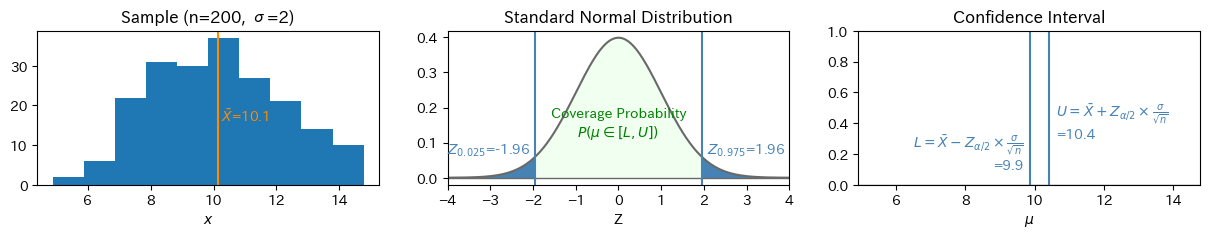

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm

n = 200
sigma = 2
x = norm.rvs(loc=10, scale=sigma, size=n, random_state=0)
x_bar = x.mean()

fig, axes = plt.subplots(dpi=100, figsize=[15, 2], ncols=3)
# Histogram
axes[0].set(title=f"Sample (n={n}, σ={sigma})", xlabel="$x$")
axes[0].hist(x, bins=10)
axes[0].axvline(x=x_bar, color="darkorange")
axes[0].text(x_bar + 0.1, n*0.08, r"$\bar{X}$"+f"={x_bar:.1f}", color="darkorange", horizontalalignment="left")


# Z and Standard Normal Dist
z = np.linspace(-4, 4, 300)
y = norm.pdf(z)
axes[1].set(title="Standard Normal Distribution", xlabel="Z", xlim=(-4, 4))
axes[1].plot(z, y, color="dimgray")
axes[1].axhline(y=0, color="dimgray", linewidth=1)
alpha = 0.05 / 2
for a in [alpha, (1 - alpha)]:
    z_ = norm.ppf(a)
    axes[1].axvline(x=z_, color="steelblue")
    if z_ < 0:
        axes[1].text(z_ - 0.1, norm.pdf(z_) + 0.01, r"$Z_{0.025}$" + f"={z_:.2f}", color="steelblue", horizontalalignment="right")
        axes[1].fill_between(z, 0, y, where = z <= z_, color="steelblue")
    else:
        axes[1].text(z_ + 0.1, norm.pdf(z_) + 0.01, r"$Z_{0.975}$" + f"={z_:.2f}", color="steelblue", horizontalalignment="left")
        axes[1].fill_between(z, 0, y, where = z >= z_, color="steelblue")

is_accept = np.abs(z) <= norm.ppf(a)
axes[1].fill_between(z[is_accept], 0, y[is_accept], color="honeydew")
axes[1].text(0, norm.pdf(0) * 0.3, "Coverage Probability\n$P(\mu \in [L, U])$", color="green", horizontalalignment="center")


# Confidence interval
xlim = (x.min(), x.max())
x_space = np.linspace(xlim, 300)
y = norm.pdf(x_space)
axes[2].set(title="Confidence Interval", xlabel=r"$\mu$", xlim=xlim)
axes[2].axhline(y=0, color="dimgray", linewidth=1)

alpha = 0.05 / 2
for a in [alpha, (1 - alpha)]:
    z_ = norm.ppf(a)
    lower_or_upper = x_bar + z_ * (sigma / np.sqrt(n))
    axes[2].axvline(x=lower_or_upper, color="steelblue")
    if z_ < 0:
        axes[2].text(lower_or_upper - 0.2, 0.1, r"$L=\bar{X} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$" + f"\n={lower_or_upper:.1f}", color="steelblue", horizontalalignment="right")
    else:
        axes[2].text(lower_or_upper + 0.2, 0.3, r"$U=\bar{X} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$" + f"\n={lower_or_upper:.1f}", color="steelblue", horizontalalignment="left")

fig.show()

## 検定

母平均$\mu$、母分散$\sigma^2$の正規母集団についての

$$
H_0: \mu = \mu_0 \text{ vs } H_1: \mu \neq \mu_0
$$

という検定問題について考える。


帰無仮説が正しければ、標本平均は中心極限定理により正規分布$N(\mu, \sigma^2 / n)$に従うため、標準化した$Z$は標準正規分布$N(0, 1)$に従う。
なので、標準正規分布のパーセント点$Z_{\alpha/2}$と比較して

$$
|Z| > Z_{\alpha/2} \implies H_0\text{を棄却}\\
|Z| \leq Z_{\alpha/2} \implies H_0\text{を受容}\\
$$

となる


検定の棄却域は有意水準$\alpha$、すなわち「帰無仮説$H_0$が正しいにも関わらず誤って$H_0$を棄却してしまう確率」を

$$
P_{\mu = \mu_0}(|Z| > Z_{\alpha/2}) = \alpha
$$

となるように$Z_{\alpha/2}$を設定している。 ($\mu = \mu_0$は帰無仮説のもとで、ということ）

逆に受容域は

$$
P_{\mu = \mu_0}(|Z| \leq Z_{\alpha/2}) = 1 - \alpha
$$


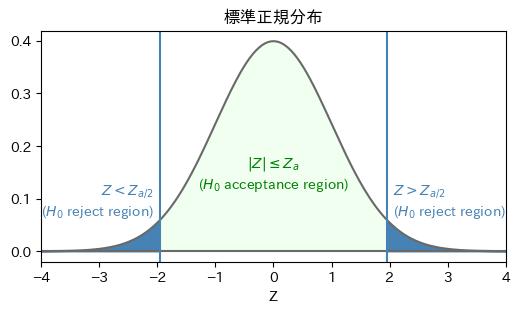

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm

z = np.linspace(-4, 4, 300)
y = norm.pdf(z)

fig, ax = plt.subplots(dpi=100, figsize=[6, 3])
ax.set(title="標準正規分布", xlabel="Z", xlim=(-4, 4))
ax.plot(z, y, color="dimgray")
ax.axhline(y=0, color="dimgray", linewidth=1.5)

# 区間推定
alpha = 0.05 / 2
for a in [alpha, (1 - alpha)]:
    x = norm.ppf(a)
    ax.axvline(x=x, color="steelblue")
    if x < 0:
        ax.text(x - 0.1, norm.pdf(x) + 0.01, "$Z < Z_{a/2}$\n($H_0$ reject region)", color="steelblue", horizontalalignment="right")
        ax.fill_between(z, 0, y, where = z <= x, color="steelblue")
    else:
        ax.text(x + 0.1, norm.pdf(x) + 0.01, "$Z > Z_{a/2}$\n($H_0$ reject region)", color="steelblue", horizontalalignment="left")
        ax.fill_between(z, 0, y, where = z >= x, color="steelblue")


# 仮説検定
is_accept = np.abs(z) <= norm.ppf(a)
ax.fill_between(z[is_accept], 0, y[is_accept], color="honeydew")
ax.text(0, norm.pdf(0) * 0.3, "$|Z| \leq Z_a$\n($H_0$ acceptance region)", color="green", horizontalalignment="center")

fig.show()

## まとめ

- 信頼区間とは、ある区間$[L, U]$が母数$\mu$を含む確率が$1-\alpha$になるような区間のこと：$P_{\mu}( \mu \in [L, U] ) = 1-\alpha$
- 仮説検定とは、帰無仮説のもとで確率変数$X$が受容域$A = \big\{ X \in \mathcal{X}\ \big| \ |Z| \leq Z_{\alpha/2} \big\}$に含まれる確率を$P_{\mu = \mu_0}(X \in A) = 1 - \alpha$として、その範囲内に統計量$T$が収まるかどうかを判定したもの

<!-- $A = \big\{ x \in \mathcal{X}\ \big| \ |Z| \leq Z_{\alpha/2} \big\}$ -->

## 参考文献

- 久保川達也（2017）『現代数理統計学の基礎』、p.169